# Lab 4

In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

diabetes.data.shape

(442, 10)

In [2]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

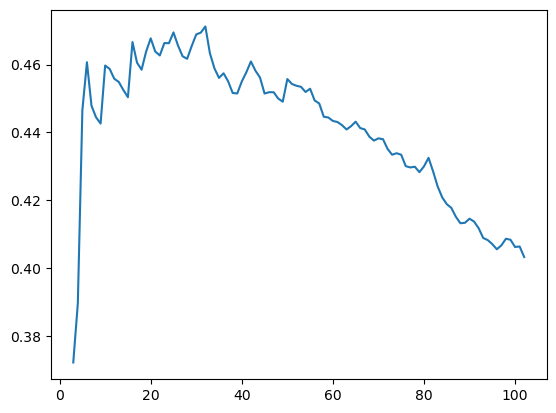

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(diabetes['data'],
diabetes['target'], random_state=42)

K_max = 100


results = np.empty(K_max)
for k in range(K_max):
    knn = KNeighborsRegressor(n_neighbors=k+3)
    knn.fit(X_train, y_train)
    results[k] = knn.score(X_test, y_test)
    
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.arange(K_max)+3,results)

In [4]:
help(KNeighborsRegressor.score)

Help on function score in module sklearn.base:

score(self, X, y, sample_weight=None)
    Return the coefficient of determination of the prediction.
    
    The coefficient of determination :math:`R^2` is defined as
    :math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
    sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
    is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always predicts
    the expected value of `y`, disregarding the input features, would get
    a :math:`R^2` score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, where ``n_samples_fitted``
        is the number of sample

## Using Cross-Validation to get an Inverted U-shaped Curve

In [5]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsRegressor(n_neighbors=3)
print(cross_val_score(knn, X_train, y_train))

[0.28743721 0.24283699 0.32312734 0.32108514 0.12845082]


In [6]:
from sklearn.utils import shuffle
X, y = shuffle(diabetes.data, diabetes.target, random_state=42)
print(cross_val_score(knn, X, y))

[0.36498737 0.32300369 0.26748019 0.43230668 0.40572547]


In [7]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.37222167132521977

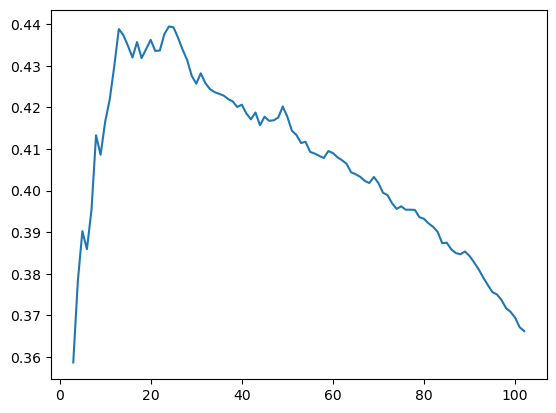

In [8]:
K_max = 100

for k in range(K_max):
    knn = KNeighborsRegressor(n_neighbors=k + 3)
    results[k] = np.mean(cross_val_score(knn, X, y))
plt.plot(np.arange(K_max) + 3,results)
plt.show()

### Exercise 1

The `np.mean` function ensures we get a singular value for the average cross-validation score, as simply using the `cross_val_score` returns an array which is difficult to plot.

### Exercise 2


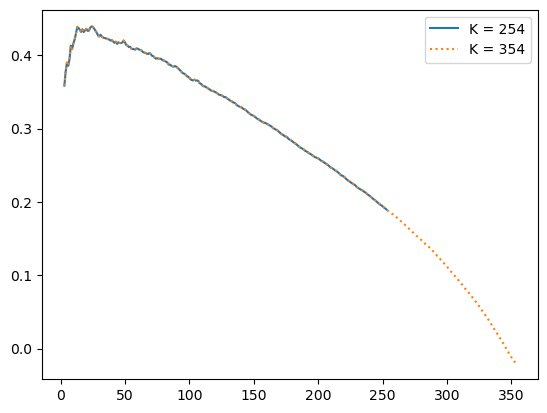

In [9]:
K_max_1 = 251
K_max_2 = 351

results_1 = np.zeros(K_max_1)
results_2 = np.zeros(K_max_2)

for k in range(K_max_1):
    knn = KNeighborsRegressor(n_neighbors=k + 3)
    results_1[k] = np.mean(cross_val_score(knn, X, y))

for k in range(K_max_2):
    knn = KNeighborsRegressor(n_neighbors=k + 3)
    results_2[k] = np.mean(cross_val_score(knn, X, y))


plt.plot(np.arange(K_max_1) + 3, results_1, label="K = 254")
plt.plot(np.arange(K_max_2) + 3, results_2, label="K = 354", linestyle=":")
plt.legend()
plt.show()

## Learning Curves

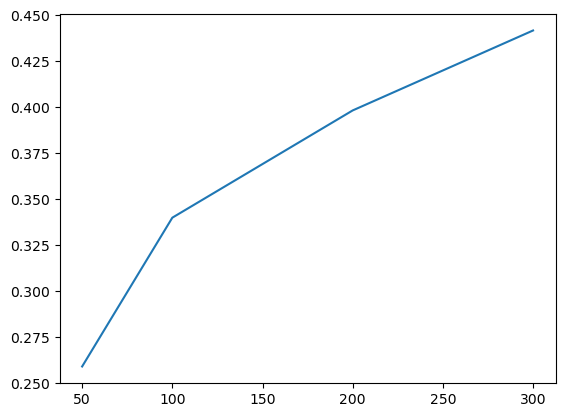

In [10]:
knn = KNeighborsRegressor(n_neighbors=10)
train_sizes = np.array([50,100,200,300])
results = np.empty(train_sizes.size)
for k in range(train_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
        diabetes.target, train_size=train_sizes[k], random_state=42)
    knn.fit(X_train, y_train)
    results[k] = knn.score(X_test, y_test)

plt.plot(train_sizes,results)
plt.show()

### Exercise 3

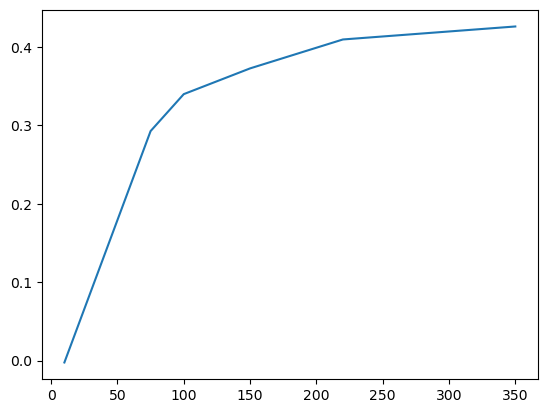

In [11]:
knn = KNeighborsRegressor(n_neighbors=10)
train_sizes = np.array([10,75,100,150,220,350])
results = np.empty(train_sizes.size)
for k in range(train_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
        diabetes.target, train_size=train_sizes[k], random_state=42)
    knn.fit(X_train, y_train)
    results[k] = knn.score(X_test, y_test)

plt.plot(train_sizes,results)
plt.show()

Here we can see the graph moves very quickly up for lower values, meaning the accuracy quickly goes up as we increase the training set sizes. It then tapers off near 0.4 and the rate of learning decreases.

### Exercise 4

In [12]:
knn = KNeighborsRegressor(n_neighbors=10)
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
        diabetes.target, train_size=100, random_state=42)
knn.fit(X_train, y_train)
print("Specifying training size:", knn.score(X_test, y_test))

X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
        diabetes.target, test_size=100, random_state=42)
knn.fit(X_train, y_train)
print("Specifying test size:\t ", knn.score(X_test, y_test))

X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
        diabetes.target, train_size=200, test_size=50, random_state=42)
knn.fit(X_train, y_train)
print("Specifying both:\t ",knn.score(X_test, y_test))



Specifying training size: 0.3398866069694102
Specifying test size:	  0.4655130597300666
Specifying both:	  0.48296286391742305


When specifying the training size but not test size, the remaining samples after the training set are separated is taken as the test set.

Taking the test size but not the training size is the same but in reverse.

You can specify both train and test size, but they must not overlap or exceed 1 if expressed as a fraction. If not, any samples not specified will be unused